In [1]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

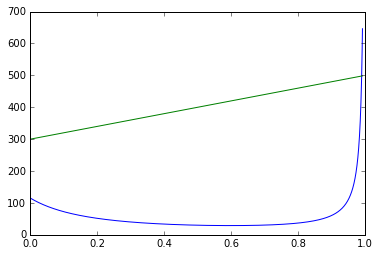

In [16]:
ko = 8.8
E = 35000
Hrxn = -50000
Cpa = 250
To = 300
Cao = 2000
dp = 2.5e-3
pbed = 1200
pc = 2000
De = 1.8e-9
W = 900
Q = 60/3600
Fao = Cao*Q
def dndt(p,W):
    x,T = p
    ki = ko*np.exp(-E/(8.314*T))
    O = ((ki*pc*(dp/2)**2)/De)**0.5
    n = 3/(O**2)*(O/np.tanh(O) - 1)
    dxdw = n*ki*(1-x)/Q
    ra = -n*ki*Fao*(1-x)/Q
    dTdw = ra*Hrxn/(Fao*Cpa)
    return dxdw,dTdw
    
wspan = np.linspace(0,W*2,1001)
ans = odeint(dndt,[0,To],wspan)
x = ans[:,0]
T = ans[:,1]
ki = ko*np.exp(-E/(8.314*T))
O = ((ki*pc*(dp/2)**2)/De)**0.5
n = 3/(O**2)*(O/np.tanh(O) - 1)
ra = -n*ki*Fao*(1-x)/Q
plt.plot(x,1/-ra)
n[-1]
plt.plot(x,T)

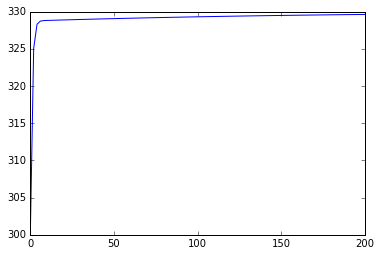

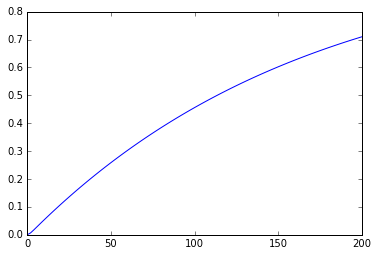

0.709882211166 329.6207907


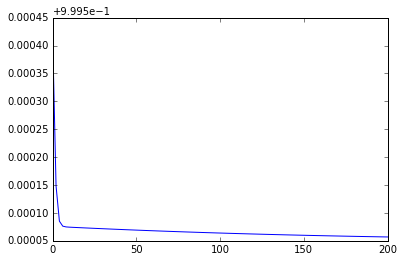

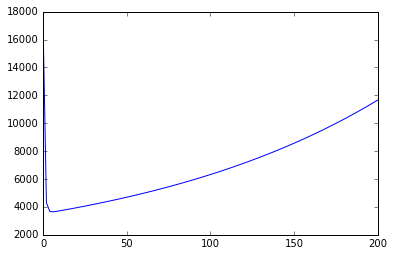

In [8]:
Q = 1.4/1000/60
Hrxn = 50000
Cpa = 250
pc = 1800
Fao = 2000*Q
pbed = 800
Ua = 9.1e3
Tu = 330
def dndt(para,w):
    x,T = para
    ki = 2*np.exp(-45000/(8.314*T))
    O = (ki*pc*((0.5e-3)**2)/1e-8)**0.5
    n = (3/O**2)*(O/np.tanh(O) - 1)
    dxdw = n*ki*(1-x)/Q
    dTdW = (Ua/pbed*(Tu - T) - (n*ki*Fao*(1-x)/Q)*Hrxn)/(Fao*Cpa)
    return dxdw,dTdW

wspan = np.linspace(0,200,101)
Ans = odeint(dndt,[0,300],wspan)
X = Ans[:,0]
T = Ans[:,1]
plt.plot(wspan,T)
plt.show()
plt.plot(wspan,X)
ki = 2*np.exp(-45000/(8.314*T))
O = (ki*pc*(0.5e-3)**2/1e-8)**0.5
n = 3/O**2*(O/np.tanh(O) - 1)
plt.show()
plt.plot(wspan,n)
max = np.argmax(T)
print (X[max],T[max])
ra = -Fao*n*ki*(1-X)/Q
plt.show()
plt.plot(wspan,1/-ra)

In [26]:

def func(X):
    
    eqn1 =0.9/4.135 - 1/(1/0.455557 + 1/X*(1/(9.629e-3*0.5785) + 1/(1.5*4.2955e-3)))
    return eqn1

ans = fsolve(func,100)
ans

array([ 139.50658511])

In [66]:
Ccat = 100

def func2(p):
    x,T,Cas,Cab =p
    ra = 15*x/10
    ki = 1.95e5*np.exp(-40000/(8.314*T))
    Cax = 4*3*np.exp(1500*(1/T  -1/298))
    O = (ki*2000*(1e-3)**2/1.2e-8)**0.5
    n = 3/(O**2)*(O/np.tanh(O) - 1)
    
    eqn1 = 150*(T-298) + x*-20000
    eqn2 = ra-(n*ki*Ccat*Cas)
    eqn3 = ra - (1.5*4.2955e-3*Ccat*(Cab -Cas))
    eqn4 = ra - 0.455557*(Cax - Cab)
    return eqn1,eqn2,eqn3,eqn4

x = fsolve(func2,[0.5,369,10,20])
x

array([   0.52278481,  367.70464177,    1.68304852,    2.90010082])

In [ ]:

def func2(p):
    Ccat,Cas,Cab =p
    x = 0.6
    T = 378
    ra = 15*x/10
    ki = 1.95e5*np.exp(-40000/(8.314*T))
    Cax = 4*3*np.exp(1500*(1/T  -1/298))
    O = (ki*2000*(1e-3)**2/1.2e-8)**0.5
    n = 3/(O**2)*(O/np.tanh(O) - 1)
    
    print (ra,ki,n,Cax)
    eqn1 = 150*(T-298) + 0.6*-20000
    eqn2 = ra - (n*ki*Ccat*Cas)
    eqn3 = ra - (1.5*4.2955e-3*Ccat*(Cab -Cas))
    eqn4 = ra - 0.455557*(Cax - Cab)
    print (Ccat)
    return eqn1,eqn2,eqn3,eqn4

x = fsolve(func2,[100,1,2])